In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv',nrows=1000000)

In [3]:
df.shape

(1000000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [6]:
df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

# Data Cleaning

In [7]:
df.dropna(inplace=True)
df.drop('key',axis=1, inplace=True)

###Null Island
Null Island is the name used to refer to the point on the Earth's surface where the Prime Meridian and the Equator intersect, at zero degrees latitude and zero degrees longitude ( 0°N 0°E).

delete rows where longitude or latitude is equal to 0

In [8]:
df[(df.pickup_longitude == 0) | (df.pickup_latitude == 0) | (df.dropoff_longitude == 0) | (df.dropoff_latitude == 0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3
15,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1
26,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1
124,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2
192,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...
999713,8.0,2013-06-07 20:40:21 UTC,0.0,0.0,0.0,0.0,2
999723,3.5,2013-03-03 13:18:00 UTC,0.0,0.0,0.0,0.0,6
999731,9.0,2014-05-04 23:27:00 UTC,0.0,0.0,0.0,0.0,6
999888,9.3,2010-04-28 21:08:00 UTC,0.0,0.0,0.0,0.0,3


In [9]:
drop_i = df[(df.pickup_longitude == 0) | (df.pickup_latitude == 0) | (df.dropoff_longitude == 0) | (df.dropoff_latitude == 0)].index
df = df.drop(drop_i)

delete rows that have fare price less or equal to 0

In [10]:
drop_i = df[df.fare_amount <= 0].index
df = df.drop(drop_i)

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

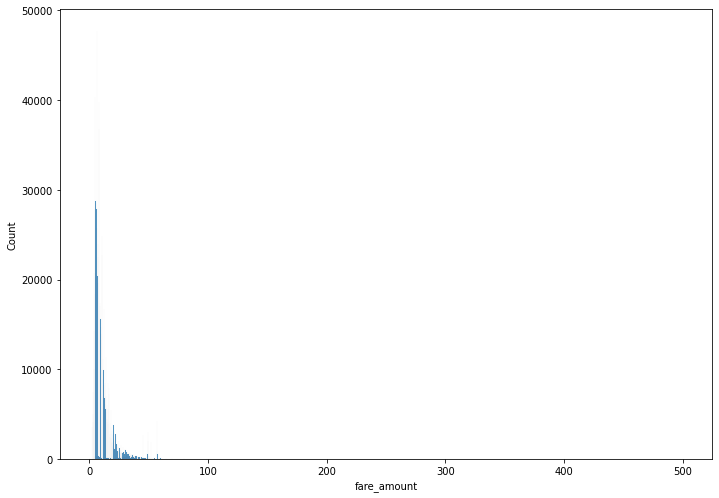

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.histplot(df.fare_amount)

In [12]:
df.fare_amount.mean()

11.33360151877026

Negleting outliers using 5*standard deviation

In [13]:
df['fare_amount'].mean() + 5* df['fare_amount'].std()

60.07422844227874

In [14]:
df[df.fare_amount > 60]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
649,66.3,2009-09-19 10:34:41 UTC,-74.438233,40.993260,-74.185996,40.693874,2
1335,180.0,2013-01-16 20:19:58 UTC,-74.429332,40.500046,-74.429332,40.500046,1
1483,165.0,2009-08-07 21:49:13 UTC,-73.633363,41.032490,-73.633671,41.032598,1
1494,70.0,2009-09-01 14:18:00 UTC,-74.105395,40.707137,-74.105402,40.707113,1
1709,65.5,2014-07-31 14:49:37 UTC,-73.990904,40.760694,-74.177083,40.694982,1
...,...,...,...,...,...,...,...
997584,99.3,2009-10-13 14:37:00 UTC,-73.783762,40.648633,-73.384432,40.681198,2
998024,75.5,2009-04-09 15:31:00 UTC,-73.984360,40.754767,-74.177807,40.690177,1
998440,77.0,2015-01-19 08:35:54 UTC,-73.975540,40.757881,-74.181435,40.687733,4
999415,69.0,2013-02-09 23:12:00 UTC,-74.006312,40.730457,-73.805170,40.908662,4


In [15]:
drop_i = df[df.fare_amount > 60].index
df = df.drop(drop_i)

In [16]:
df.shape

(977769, 7)

In [17]:
df.passenger_count.value_counts()

1    675665
2    145000
5     69090
3     42827
4     20945
6     20762
0      3480
Name: passenger_count, dtype: int64

The maximum amount of passengers allowed in a yellow taxicab by law is four (4) in a four (4) passenger taxicab or five (5) passengers in a five (5) passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven (7) and is held on the lap of an adult passenger seated

https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page

Deleting rows where passenger_count == 0 or greate than 4

In [18]:
df[(df.passenger_count == 0) | (df.passenger_count > 4)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
38,9.0,2013-11-24 11:42:00 UTC,-73.957740,40.773617,-73.977087,40.758465,6
48,3.3,2012-07-18 00:16:00 UTC,-73.986660,40.756072,-73.989727,40.751702,5
60,5.0,2014-07-16 10:57:00 UTC,-73.996148,40.741890,-73.992202,40.739425,6
63,7.0,2014-05-01 09:12:00 UTC,-73.966203,40.767500,-73.980915,40.774240,6
67,16.5,2014-04-29 18:28:00 UTC,-73.970323,40.750840,-73.998392,40.724862,6
...,...,...,...,...,...,...,...
999973,11.3,2011-05-07 12:53:00 UTC,-73.952537,40.808417,-73.953065,40.803848,5
999977,13.3,2011-02-10 12:08:13 UTC,-74.015867,40.715233,-73.989395,40.758612,0
999988,25.3,2011-05-14 07:21:00 UTC,-73.937393,40.757975,-73.937393,40.757975,5
999989,5.0,2012-11-11 10:36:00 UTC,-73.982482,40.747582,-73.986402,40.738122,5


In [19]:
drop_i = df[(df.passenger_count == 0) | (df.passenger_count > 4)].index
df = df.drop(drop_i)

In [20]:
df.shape

(884437, 7)

## USE THE HAVERSINE FORMULA

The Haversine formula calculates the great-circle distance between two points. Start by calculating the change in latitude and longitude, in radians, and input the result into the Haversine formula (implemented below). Use the functions in the math library for trigonometry related calculations.

In [21]:
def cal_dist(pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude):
    dlon = np.deg2rad(dropoff_longitude) - np.deg2rad(pickup_longitude)
    dlat = np.deg2rad(dropoff_latitude) - np.deg2rad(pickup_latitude)
    pre_dist = np.sin(dlat / 2)**2 + np.cos(pickup_latitude) * np.cos(dropoff_latitude) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(pre_dist), np.sqrt(1 - pre_dist))
    distance = 6373.0 * c
    return distance

In [22]:
df['distance'] = df.apply(lambda x: cal_dist(x.pickup_longitude,x.pickup_latitude,x.dropoff_longitude,x.dropoff_latitude),axis=1) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


In [23]:
df.head(3)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.048889
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.855026
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.518841


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884437 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        884437 non-null  float64
 1   pickup_datetime    884437 non-null  object 
 2   pickup_longitude   884437 non-null  float64
 3   pickup_latitude    884437 non-null  float64
 4   dropoff_longitude  884437 non-null  float64
 5   dropoff_latitude   884437 non-null  float64
 6   passenger_count    884437 non-null  int64  
 7   distance           884431 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 60.7+ MB


In [25]:
df['distance'] = np.int32(df['distance'])

In [26]:
df.distance.max(),df.distance.min(),df.distance.std()

(18692, -2147483648, 5593334.763144921)

In [27]:
df = df.drop(df[df.distance < 0].index)

New York/Land area is 783.8 km²
* so we can delete distance over 783

In [28]:
df = df.drop(df[df.distance > 783].index)

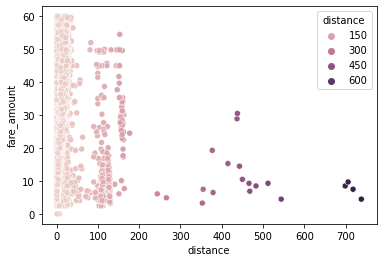

In [29]:
# skipping the distance less than 1 km
except_zero = df[df.distance != 0]
sns.scatterplot(y = 'fare_amount',x = 'distance',data=except_zero,hue='distance')
plt.show()

## Creating new features from timedate columns

Creating new feature using pickupdatetime columns


In [30]:
def time_features(df,time_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df['day'] = pd.to_datetime(df[time_col]).dt.day
    df['dayofweek'] = pd.to_datetime(df[time_col]).dt.dayofweek
    df['week']=pd.to_datetime(df[time_col]).dt.isocalendar().week
    df['hour'] = pd.to_datetime(df[time_col]).dt.hour
    df['minute'] = pd.to_datetime(df[time_col]).dt.minute
    df['month'] = pd.to_datetime(df[time_col]).dt.month
    return df

In [31]:
df = time_features(df,'pickup_datetime')
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,day,dayofweek,week,hour,minute,month
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1,15,0,25,17,26,6
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8,5,1,1,16,52,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1,18,3,33,0,35,8
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2,21,5,16,4,30,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2,9,1,10,7,51,3


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884246 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        884246 non-null  float64            
 1   pickup_datetime    884246 non-null  datetime64[ns, UTC]
 2   pickup_longitude   884246 non-null  float64            
 3   pickup_latitude    884246 non-null  float64            
 4   dropoff_longitude  884246 non-null  float64            
 5   dropoff_latitude   884246 non-null  float64            
 6   passenger_count    884246 non-null  int64              
 7   distance           884246 non-null  int32              
 8   day                884246 non-null  int64              
 9   dayofweek          884246 non-null  int64              
 10  week               884246 non-null  UInt32             
 11  hour               884246 non-null  int64              
 12  minute             884246 non-

In [33]:
df.week = np.int32(df.week)

creating bins for minute

In [34]:
def min_bin(min):
    if min >= 46: return 3
    elif min >= 31: return 2
    elif min >= 16: return 1
    elif min >= 0: return 0

In [35]:
df['min_bin'] = df.minute.apply(lambda x:min_bin(x))

In [36]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,day,dayofweek,week,hour,minute,month,min_bin
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1,15,0,25,17,26,6,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8,5,1,1,16,52,1,3
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1,18,3,33,0,35,8,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2,21,5,16,4,30,4,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2,9,1,10,7,51,3,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884246 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        884246 non-null  float64            
 1   pickup_datetime    884246 non-null  datetime64[ns, UTC]
 2   pickup_longitude   884246 non-null  float64            
 3   pickup_latitude    884246 non-null  float64            
 4   dropoff_longitude  884246 non-null  float64            
 5   dropoff_latitude   884246 non-null  float64            
 6   passenger_count    884246 non-null  int64              
 7   distance           884246 non-null  int32              
 8   day                884246 non-null  int64              
 9   dayofweek          884246 non-null  int64              
 10  week               884246 non-null  int32              
 11  hour               884246 non-null  int64              
 12  minute             884246 non-

In [38]:
df.month = np.int32(df.month)

In [39]:
df.month.value_counts().sort_index()

1     78685
2     74841
3     82567
4     81334
5     82925
6     79444
7     67343
8     63237
9     67299
10    71813
11    66943
12    67815
Name: month, dtype: int64

In [40]:
tp = df.groupby('month').sum().sort_values('fare_amount',ascending=False)
tp.head(12)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,day,dayofweek,week,hour,minute,min_bin
month,,,,,,,,,,,,,
5,945843.06,-6.088595e+06,3.333659e+06,-6.088475e+06,3.334430e+06,110549,280348,1293958,255479,1646865,1117762,2448483,120410
3,904806.62,-6.107753e+06,3.365633e+06,-6.107633e+06,3.364562e+06,109059,271238,1328925,252087,927306,1118038,2441639,119961
4,902432.62,-6.016430e+06,3.314654e+06,-6.016331e+06,3.314308e+06,107893,268597,1268901,245112,1267513,1103091,2398949,117834
6,900542.51,-5.875627e+06,3.236347e+06,-5.875564e+06,3.236378e+06,105640,264956,1225180,236742,1928373,1065717,2354589,115975
1,832150.27,-5.820474e+06,3.206380e+06,-5.820400e+06,3.206769e+06,104559,242470,1293866,244973,297810,1066846,2333941,114944
10,820564.33,-5.311642e+06,2.926050e+06,-5.311572e+06,2.926078e+06,95624,237219,1147683,221575,2996613,970865,2122192,104383
2,802145.86,-5.536132e+06,3.049654e+06,-5.536003e+06,3.050067e+06,98302,238799,1109369,229326,525990,1016570,2213553,108809
9,776191.67,-4.978416e+06,2.742435e+06,-4.978336e+06,2.742817e+06,89471,225024,1058884,205617,2517284,904082,1986277,97600
12,772879.90,-5.016167e+06,2.763320e+06,-5.016087e+06,2.763335e+06,91702,219801,1022870,204729,3311725,918670,2001766,98385


* April, May, June are the highest grossing months
* maybe because of tourist

In [41]:
tp = df.groupby('hour').sum().sort_values('fare_amount',ascending=False)
tp.head(24)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,day,dayofweek,week,minute,month,min_bin
hour,,,,,,,,,,,,,
19,578637.98,-4.094842e+06,2.254984e+06,-4.094912e+06,2.254984e+06,75202,163297,867711,161363,1402559,1628663,345329,79961
18,574825.78,-3.943195e+06,2.171333e+06,-3.943261e+06,2.171340e+06,71591,156334,837245,154334,1339317,1596193,329864,78818
20,551623.71,-3.828064e+06,2.107759e+06,-3.828100e+06,2.107401e+06,70445,166268,813822,150338,1319310,1513757,324890,74182
22,551273.86,-3.652407e+06,2.009969e+06,-3.652326e+06,2.010011e+06,69047,171823,777376,147669,1267927,1433544,312276,70136
21,546417.01,-3.723358e+06,2.049923e+06,-3.723335e+06,2.049591e+06,69718,168801,795527,146808,1290373,1483400,317616,72844
14,519018.37,-3.315676e+06,1.825848e+06,-3.315644e+06,1.826220e+06,59528,142857,701190,134537,1147605,1330046,282391,65473
23,499947.86,-3.235354e+06,1.780924e+06,-3.235250e+06,1.780968e+06,61573,158669,690308,137748,1122079,1246929,276344,60693
15,493877.26,-3.125751e+06,1.720963e+06,-3.125741e+06,1.721001e+06,56896,140136,660566,127265,1073244,1220723,264482,59605
13,492782.86,-3.210002e+06,1.767958e+06,-3.209999e+06,1.767940e+06,57586,135224,684423,133105,1110654,1293479,273427,63707


If I want to earn as maximum as a uber owner then I only take out maximum taxis during peak hours between 6 pm to 22 pm

In [42]:
tp = df.groupby('dayofweek').sum().sort_values('fare_amount',ascending=False)
tp.head(7)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,day,week,hour,minute,month,min_bin
dayofweek,,,,,,,,,,,,,
4,1524852.44,-1.006375e+07,5.540157e+06,-1.006359e+07,5.539801e+06,181668,438275,2150257,3447222,1856983,4013969,847984,197192
3,1492545.02,-9.781231e+06,5.384075e+06,-9.781063e+06,5.384074e+06,171493,427737,2073411,3369144,1845930,3920182,828579,192821
5,1451948.20,-9.881004e+06,5.439675e+06,-9.880727e+06,5.439367e+06,190678,431679,2117998,3378545,1745691,3966857,833373,195367
2,1419523.66,-9.460571e+06,5.207835e+06,-9.460438e+06,5.208230e+06,164139,407915,2002849,3276993,1782589,3797532,805530,186890
1,1367256.99,-9.164545e+06,5.046540e+06,-9.164511e+06,5.047286e+06,158960,394309,1932149,3177686,1741771,3671620,781456,180850
6,1322870.41,-8.567413e+06,4.716662e+06,-8.567124e+06,4.717176e+06,162832,414994,1814102,2936479,1382587,3407397,725990,167270
0,1273541.30,-8.443141e+06,4.651835e+06,-8.443168e+06,4.651538e+06,147903,387841,1781895,2932909,1588486,3366478,721052,165487


* friday,saturday and sunday has minimum earning
* wed,tue,thu has highest earning

In [43]:
tp = df.groupby(['pickup_longitude','pickup_latitude']).sum().sort_values('fare_amount',ascending=False)
tp.head(5)

,,fare_amount,dropoff_longitude,dropoff_latitude,passenger_count,distance,day,dayofweek,week,hour,minute,month,min_bin
pickup_longitude,pickup_latitude,,,,,,,,,,,,
-73.137393,41.366138,3787.46,-24444.887489,13707.237024,438,11919,5221,890,8810,4930,10111,2150,500
-73.940717,40.803238,357.40,-2513.984378,1387.310092,54,0,503,107,945,504,1099,234,56
-73.874500,40.774100,354.40,-887.668700,489.101200,15,131,177,24,367,181,267,90,13
-73.937835,40.758457,322.66,-813.150440,448.202730,17,70,189,32,377,138,324,90,14
-74.689831,40.190564,310.40,-2388.611524,1288.343213,41,374,417,97,348,418,1126,98,59


* highest earning and also passenger wise place is "Keith Mitchell Forest, Squantuck Road, Seymour"
* second highest "Maple Court, East 122nd Street"

https://www.gps-coordinates.net/map/state/NY

In [44]:
tp = df.groupby(['dropoff_longitude','dropoff_latitude']).sum().sort_values('fare_amount',ascending=False)
tp.head(5)

,,fare_amount,pickup_longitude,pickup_latitude,passenger_count,distance,day,dayofweek,week,hour,minute,month,min_bin
dropoff_longitude,dropoff_latitude,,,,,,,,,,,,
-73.137393,41.366138,2393.11,-18157.916405,10244.075052,329,2614,3873,680,6401,3728,7265,1565,358
-73.940717,40.803238,357.40,-2513.984378,1387.310092,54,0,503,107,945,504,1099,234,56
-74.689831,40.190564,248.10,-2165.303363,1166.105477,39,94,372,84,320,403,1059,90,56
-73.937475,40.758242,245.90,-1700.561925,937.439566,31,0,342,57,587,300,722,147,36
-73.995808,40.761200,239.50,-1701.903584,937.507600,23,0,319,64,527,271,677,134,34


dropoff also showing same places

<AxesSubplot:>

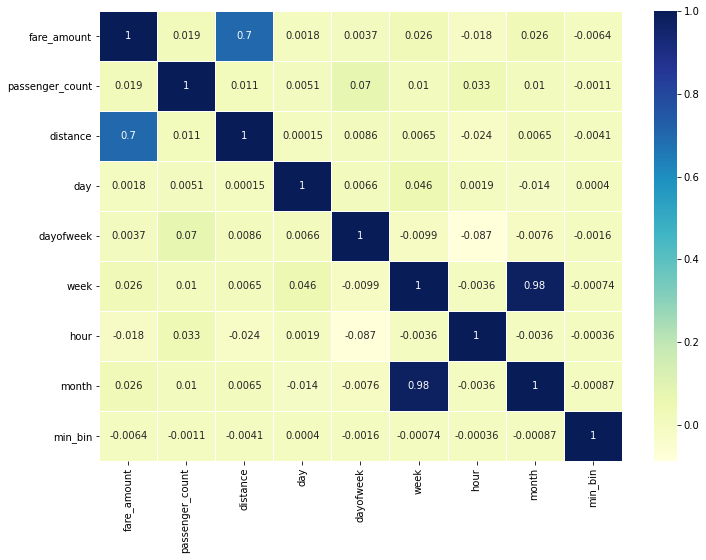

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','minute'],axis=1).corr(),cmap='YlGnBu',linewidths=.5,annot=True)

# Model

In [46]:
X = df.drop(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','minute'],axis=1)
y = df.fare_amount

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((707396, 8), (176850, 8), (707396,), (176850,))

In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred = reg.predict(X_test)
print('Linear regression, Root mean square is: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Linear regression, Root mean square is:  6.2436764243747


In [50]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred = reg.predict(X_test)
print('DecisionTreeRegressor, Root mean square is: ',np.sqrt(mean_squared_error(y_test,y_pred)))

DecisionTreeRegressor, Root mean square is:  5.641963244918069


In [51]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor().fit(X_train.values, y_train.values)
gbm.score(X_train.values, y_train.values)
y_pred = gbm.predict(X_test.values)
print('RandomForestRegressor, Root mean square is: ',np.sqrt(mean_squared_error(y_test,y_pred)))

RandomForestRegressor, Root mean square is:  3.8663761803801293


# Submission

In [52]:
test = pd.read_csv('../input/new-york-city-taxi-fare-prediction/test.csv')

In [53]:
test.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [54]:
test['distance'] = test.apply(lambda x: cal_dist(x.pickup_longitude,x.pickup_latitude,x.dropoff_longitude,x.dropoff_latitude),axis=1) 
test['distance'] = np.int32(test['distance'])
test = time_features(test,'pickup_datetime')
test['min_bin'] = test.minute.apply(lambda x:min_bin(x))

In [55]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance             0
day                  0
dayofweek            0
week                 0
hour                 0
minute               0
month                0
min_bin              0
dtype: int64

In [56]:
test.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,day,dayofweek,week,hour,minute,month,min_bin
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2,27,1,5,13,8,1,0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2,27,1,5,13,8,1,0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,0,8,5,40,11,53,10,3
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2,1,5,48,21,12,12,0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,5,1,5,48,21,12,12,0


In [57]:
X.columns

Index(['passenger_count', 'distance', 'day', 'dayofweek', 'week', 'hour',
       'month', 'min_bin'],
      dtype='object')

In [58]:
pred = test.drop(['key','pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','minute'],axis=1)

In [60]:
fare_amount = gbm.predict(pred.values)

In [61]:
submission = pd.DataFrame()
submission['key'] = test['key']
submission['fare_amount'] = fare_amount

In [62]:
submission.to_csv('submission.csv',index=False)

Submit this file

# I Hope this notebook helpful to you!!!